# Import Library and "Analyst Take Home Test.xlsx" dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Check The Data and Cleaning

In [2]:
xls = pd.ExcelFile('Analyst Take Home Test.xlsx', engine="openpyxl")

df1 = pd.read_excel(xls, 'Problem 1')
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 998 entries, 0 to 997
Data columns (total 26 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          99 non-null     datetime64[ns]
 1   Month         99 non-null     float64       
 2   Product       99 non-null     object        
 3   # Order       99 non-null     float64       
 4   Quantity      99 non-null     float64       
 5   Order Status  99 non-null     object        
 6   GMV           99 non-null     float64       
 7   Category      99 non-null     object        
 8   Unnamed: 8    0 non-null      float64       
 9   Problems:     10 non-null     object        
 10  Unnamed: 10   0 non-null      float64       
 11  Unnamed: 11   0 non-null      float64       
 12  Unnamed: 12   0 non-null      float64       
 13  Unnamed: 13   0 non-null      float64       
 14  Unnamed: 14   0 non-null      float64       
 15  Unnamed: 15   0 non-null      float64   

In [3]:
df1

,Date,Month,Product,# Order,Quantity,Order Status,GMV,Category,Unnamed: 8,Problems:,...,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25
0,2018-07-09,7.0,Mie instan pedes korea,67.0,268.0,Refunded,1340000.0,Noodles,NaN,a. What are the issues that we are running int...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2018-09-15,9.0,Chimi jagung balado,226.0,678.0,Unpaid,4068000.0,Snacks,NaN,b. What category that we need to focus on as i...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2018-08-02,8.0,Rempah bubuk bawang putih,754.0,754.0,Completed,9048000.0,Ingredients,NaN,"c. Using your answer from question a and b, pr...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2018-08-19,8.0,Mie instan kari ayam,274.0,274.0,Unpaid,1370000.0,Noodles,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2018-07-02,7.0,Chimi jagung balado,897.0,897.0,Completed,5382000.0,Snacks,NaN,Definition list:,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
993,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
994,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
995,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
996,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
#Delete problems_columns ,unnamed columns, nan_rows, and sort values by Date
df1 = df1.drop(labels=range(99, 998), axis=0)
df1 = df1.loc[:, ~df1.columns.str.contains('^Unnamed')]
df1.drop(columns="Problems:", inplace=True)

df1.sort_values("Date", ascending=True, inplace=True, ignore_index=True)
df1.head()

,Date,Month,Product,# Order,Quantity,Order Status,GMV,Category
0,2018-07-01,7.0,Mie instan pedes korea,138.0,138.0,Unpaid,690000.0,Noodles
1,2018-07-02,7.0,Chimi jagung balado,897.0,897.0,Completed,5382000.0,Snacks
2,2018-07-03,7.0,Mie instan goreng,568.0,1704.0,Completed,8520000.0,Noodles
3,2018-07-04,7.0,Brownies crispy keju,163.0,489.0,Unpaid,4645500.0,Snacks
4,2018-07-05,7.0,Chimi jagung bakar,994.0,994.0,Completed,5964000.0,Snacks


## Pivot the tables with Category and Order Status columns as index

In [5]:
pd.options.display.float_format = "{:,.2f}".format

df1_pivot = df1.pivot_table(values=["Quantity", "GMV"], index=["Category", "Order Status", "Product"])

In [6]:
df1_pivot[["Quantity", "GMV"]]

Quantity  \
Category         Order Status Product                                     
Ingredients      Completed    Kaldu pelezat sapi               2,273.67   
                              Rempah bubuk bawang putih        1,941.33   
                 Refunded     Kaldu pelezat sapi                 183.00   
                              Rempah bubuk bawang putih          183.33   
                 Unpaid       Kaldu pelezat sapi                 607.33   
                              Rempah bubuk bawang putih          776.00   
Noodles          Completed    Mie instan ayam bawang           1,411.67   
                              Mie instan goreng                1,760.67   
                              Mie instan kari ayam             2,376.00   
                              Mie instan pedes korea           2,600.33   
                 Refunded     Mie instan ayam bawang             285.33   
                              Mie instan goreng                  212.00   
                              Mie instan kari ayam               276.67   
                              Mie instan pedes korea             218.33   
                 Unpaid       Mie instan ayam bawang             682.67   
                              Mie instan goreng                1,228.33   
                              Mie instan kari ayam               663.33   
                              Mie instan pedes korea             179.00   
Personal hygiene Completed    Hand sanitizer lemongrass 300ml  2,551.67   
                              Hand sanitizer peppermint 30ml   3,293.33   
                 Refunded     Hand sanitizer lemongrass 300ml    195.67   
                              Hand sanitizer peppermint 30ml     235.33   
                 Unpaid       Hand sanitizer lemongrass 300ml    610.00   
                              Hand sanitizer peppermint 30ml     679.33   
Snacks           Completed    Brownies crispy keju             2,302.33   
                              Chimi jagung bakar               2,623.00   
                              Chimi jagung balado              2,689.00   
                 Refunded     Brownies crispy keju               222.67   
                              Chimi jagung bakar                 196.33   
                              Chimi jagung balado                262.67   
                 Unpaid       Brownies crispy keju               837.00   
                              Chimi jagung bakar                 758.67   
                              Chimi jagung balado                760.33   

                                                                         GMV  
Category         Order Status Product                                         
Ingredients      Completed    Kaldu pelezat sapi               40,926,000.00  
                              Rempah bubuk bawang putih        23,296,000.00  
                 Refunded     Kaldu pelezat sapi                3,294,000.00  
                              Rempah bubuk bawang putih         2,200,000.00  
                 Unpaid       Kaldu pelezat sapi               10,932,000.00  
                              Rempah bubuk bawang putih         9,312,000.00  
Noodles          Completed    Mie instan ayam bawang            7,058,333.33  
                              Mie instan goreng                 8,803,333.33  
                              Mie instan kari ayam             11,880,000.00  
                              Mie instan pedes korea           13,001,666.67  
                 Refunded     Mie instan ayam bawang            1,426,666.67  
                              Mie instan goreng                 1,060,000.00  
                              Mie instan kari ayam              1,383,333.33  
                              Mie instan pedes korea            1,091,666.67  
                 Unpaid       Mie instan ayam bawang            3,413,333.33  
                              Mie instan goreng                 6,141,666.67  
               

In [7]:
df1.groupby("Category")["Quantity", "GMV"].sum().astype(int)

C:\Users\asus\Anaconda3\envs\sinyal\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,Quantity,GMV
Category,,
Ingredients,17894,269880000
Noodles,35683,178415000
Personal hygiene,22696,529120000
Snacks,31956,227037000


(array([0, 1, 2, 3]),
 [Text(0, 0, 'Noodles'),
  Text(1, 0, 'Snacks'),
  Text(2, 0, 'Personal hygiene'),
  Text(3, 0, 'Ingredients')])

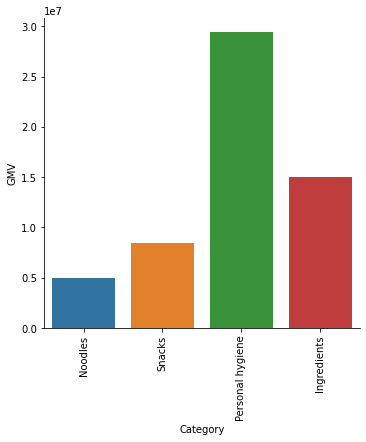

In [8]:
#Pendapatan berdasarkan Category

%matplotlib inline
sns.catplot(x="Category", y="GMV", data=df1, kind="bar", ci=0)
plt.xticks(rotation=90)

(array([0, 1, 2, 3]),
 [Text(0, 0, 'Noodles'),
  Text(1, 0, 'Snacks'),
  Text(2, 0, 'Personal hygiene'),
  Text(3, 0, 'Ingredients')])

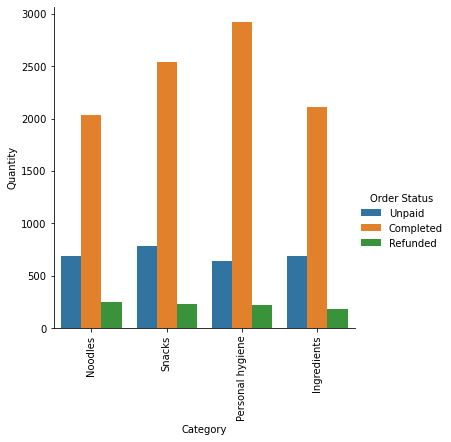

In [9]:
%matplotlib inline
sns.catplot(x="Category", y="Quantity", data=df1, kind="bar", ci=0, hue="Order Status")
plt.xticks(rotation=90)

## Berdasarkan informasi di atas dapat dilihat kuantitas penjualan terbanyak ada pada kategori Snacks dan Noodles, akan tetapi potensi pendapatan terbanyak justru ada pada kategori Personal hygiene dan Ingredients.

In [10]:
subset_completed = df1[df1["Order Status"]== "Completed"]
subset_refunded = df1[df1["Order Status"]== "Refunded"]
subset_unpaid = df1[df1["Order Status"]== "Unpaid"]

In [20]:
income_fix = (subset_completed["GMV"].sum() + subset_refunded["GMV"].sum())
income_not_paid = (subset_unpaid["GMV"].sum())
print("Potensi keuntungan pada Q3 sebesar: " + "Rp.{:,.2f}".format(subset_completed["GMV"].sum()+\
                                                                                       subset_refunded["GMV"].sum()))

print("Total riil pada Q3 adalah sebesar: " + "Rp.{:,.2f}".format(subset_completed["GMV"].sum()-\
                                                                                       subset_refunded["GMV"].sum()\
                                                                                        -subset_unpaid["GMV"].sum()))

print("Total Pemesanan yang dibatalkan sebesar: " + "Rp.{:,.2f}".format(subset_refunded["GMV"].sum()))
print("Total pendapatan akrual pada Q3 sebesar: " + "Rp.{:,.2f}".format(subset_unpaid["GMV"].sum()))

Potensi keuntungan pada Q3 sebesar: Rp.957,643,500.00
Total riil pada Q3 adalah sebesar: Rp.557,805,000.00
Total Pemesanan yang dibatalkan sebesar: Rp.76,515,000.00
Total pendapatan akrual pada Q3 sebesar: Rp.246,808,500.00


In [23]:
# Hitung Rasio yang belum dibayar dengan yang sudah dibayarkan

income_fix = (subset_completed["GMV"].sum())
income_refunded = subset_refunded["GMV"].sum()
income_not_paid = (subset_unpaid["GMV"].sum())
total = income_fix + income_not_paid

print("Rasio pendapatan yang dibayarkan: " + "{:,.2f}%".format(100*(income_fix)/total))
print("Rasio pendapatan yang dibayarkan: " + "{:,.2f}%".format(100*(income_refunded)/total))
print("Rasio pendapatan akrual terhadap total: " + "{:,.2f}%".format(100*(income_not_paid)/total))

Rasio pendapatan yang dibayarkan: 78.12%
Rasio pendapatan yang dibayarkan: 6.78%
Rasio pendapatan akrual terhadap total: 21.88%


## Berdasarkan rasio juga dapat disimpulkan bahwasanya pendapatan akrual(yang belum dibayarkan) tergolong tinggi yaitu sebesar 20.49%.

In [15]:
df1.groupby("Category")["Quantity"].agg(["sum", "mean"])

,sum,mean
Category,,
Ingredients,"17,894.00",994.11
Noodles,"35,683.00",991.19
Personal hygiene,"22,696.00","1,260.89"
Snacks,"31,956.00","1,183.56"


### Lalu penjualan rata-rata Q3 untuk tiap kategorinya sendiri dapat dilihat pada tabel di atas.

## Cek harga tiap produk

In [16]:
total_sold = df1.groupby("Product")["Quantity"].sum()
total_sold = total_sold.astype(int)

GMV_per_product = df1.groupby("Product")["GMV"].sum()
GMV_per_product = GMV_per_product.astype(int)

price_per_product = GMV_per_product/total_sold

In [17]:
price_per_product

Product
Brownies crispy keju               9,500.00
Chimi jagung bakar                 6,000.00
Chimi jagung balado                6,000.00
Hand sanitizer lemongrass 300ml   40,000.00
Hand sanitizer peppermint 30ml    10,000.00
Kaldu pelezat sapi                18,000.00
Mie instan ayam bawang             5,000.00
Mie instan goreng                  5,000.00
Mie instan kari ayam               5,000.00
Mie instan pedes korea             5,000.00
Rempah bubuk bawang putih         12,000.00
dtype: float64

### Berdasarkan tabel di atas sangat menjelaskan alasan walaupun kuantitas produk dengan kategori Noodles dan Snack banyak terjual akan tetapi pendapatan yang didapatkan tidak sebanyak dua kategori lainnya

## Cek kuantitas masing-masing produk terjual

Text(0.5, 6.79999999999999, 'Kuantitas Terjual')

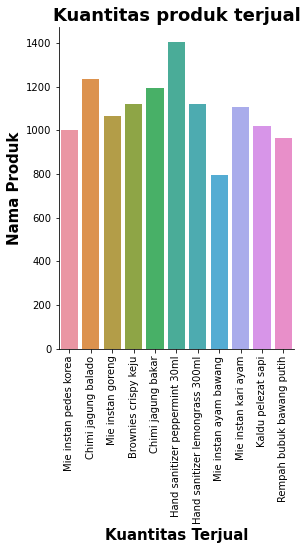

In [18]:
%matplotlib inline
sns.catplot(x="Product", y="Quantity", data=df1, kind="bar", ci=0)
plt.xticks(rotation=90)
plt.title("Kuantitas produk terjual", fontsize=18, weight="bold")
plt.ylabel("Nama Produk", fontsize=15, weight="bold")
plt.xlabel("Kuantitas Terjual", fontsize=15, weight='bold')

### Berdasarkan barplot total penjualan produk tertinggi selama Q3 2018, ialah: 

a. Hand Sanitizer peppermint 30ml \
b. Chimi Jagung Balado\
c. Chimi Jagung Bakar\
d. Brownies crispy keju & Hand sanitize lemongrass 300ml, dan Mie instan kari ayam

# A. Masalah yang harus kita perhatikan secara seksama adalah

Status pemesanan Unpaid dan Refunded, berdasarkan hasil penghitungan potensi pendapatan pada kuartal ke-3 2018 adalah Rp.957,643,500.00 namun hal tersebut belum dikurangi pendapatan akrual(belum masuk kas) sebesar Rp.246,808,500.00 atau 20.49% dan juga pengembalian(refunded) sebesar Rp. -76,515,000.00 atau 6.78% dari potensi pendapatan. Dari hal tersebut saat Q3-2018 berakhir total pendapatan perusahaan dari 4 kategori tersebut hanyalah sebesar Rp.557,805,000.00. 


# B. Kategori yang harus menjadi fokus sebagai penghasil uang adalah

Berdasarkan data pendapatan yang disampaikan tentu kita harus memberikan fokus khusus kepada tiga kategori, seperti: Personal Hygiene, Ingredients, dan Snacks yang masing-masing memiliki potensi pendapatannya masing-masing sebesar Rp.529.120.000, Rp. 269.880.000, dan Rp. 227.037.000. 

# C. Using ur answ from a & b, present clearly to top management level on ur findings and convince them w/ ur suggestion

Dari hasil analisa data di atas ada beberapa poin yang dapat saya sampaikan, yaitu:

1. Berdasarkan Poin A Status pemesanan Unpaid tergolong tinggi yang dapat mengakibatkan status refunded:

Hal ini tidak akan menjadi masalah apabila pengorder (pemesan) dapat membayar hutang tersebut secara tepat waktu, namun akan menjadi masalah apabila lewat dari batas waktu karena akan memengaruhi uang kas perusahaan. 

Hipotesa: Jika kategori unpaid yang dimaksud seperti perusahaan bermitra dengan umkm, menitipkan produknya. Maka status pemesanan unpaid berpotensi gagal bayar. Mengapa ? Mengingat saat ini rival dari lemonilo sendiri adalah perusahaan yang sudah sangat stabil (Wings Group, UNVR, ICBP/INDF, dll) tentu masyarakat berkemungkinan besar akan lebih memilih produk selain lemonilo. Sehingga apabila produk yang dititipkan tidak laku maka akan terjadi pengembalian produk(refunded). Lalu tidak terbatas dari hal itu, status refunded juga agaknya cukup bermasalah. Jika status refunded dikarenakan sistem maupun masalah stok barang hal tersebut dapat menjadi sebuah sentimen negatif.

Catatan khusus: Hipotesa adalah pendapat pribadi di luar data yang disediakan. Tidak dapat menjadi acuan karena dapat bersifat bias. Dibutuhkan data lebih banyak untuk analisa lebih lanjut.


2. Berdasarkan poin B

Secara angka, walaupun kategori Noodles(Mie) tergolong tinggi dibandingkan kategori yang lain hal tersebut tidak terlalu memengaruhi pendapatan dan juga angka tersebut sangatlah kecil dibandingkan angka konsumsi mie instan masyarakat indonesia pada tahun 2018. Saya rasa hal tersebut masih dapat dikatakan wajar dikarenakan produk lemonilo sendiri masihlah sangat hijau(baru) dan mengingat sudah stabilnya perusahaan rival yang sudah dikenal publik secara luas tentu hal ini akan menjadi tantangan yang Lemonilo harus hadapi. Benar bahwa saat ini persaingan pada kategori mie sangat ketat akan tetapi mengingat lemonilo terkhususnya produk mienya memiliki karakteristik yang khusus saya rasa pendekatan produk mie lemonilo dapat lebih mudah. 

Lalu salah satu faktor penting atas penjualan lemonilo sendiri adalah cakupan pasar dan target marketnya. Strategi yang dapat dilakukan untuk memperluas branding produk, adalah[1][2][3]:

        a. Menggunakan selebriti/selebgram untuk mengendors produk
        b. Brand image (dalam hal ini lemonilo sudah berhasil)
        c. Testimoni 
        d. Distribusi produk-produk lemonilo yang lebih luas
        e. Media sosial seperti, twitter (Sentimen positif)

Walaupun saat ini produk mie lemonilo sudah dapat dikenali masyarakat, masyarakat masih enggan untuk menggunakan produk lemonilo. Selain dari harga dan rasa, kurangnya distribusi tempat dan produk lemonilo yang lain dapat memengaruhi pengiklanan lemonilo. Dengan meletakkan produk lemonilo di sebuah ritel seperti alfamart dan indomaret sendiri itu sudah dapat menciptakan efek domino untuk masyarakat dapat mengenali produk-produk lemonilo.

[1]PENGARUH CELEBRITY ENDORSEMENT, BRAND IMAGE, DAN
TESTIMONI TERHADAP MINAT BELI KONSUMEN PRODUK MIE INSTAN
LEMONILO PADA MEDIA SOSIAL INSTAGRAM

[2]PENGARUH MARKETING MIX TERHADAP KEPUTUAN
PEMBELIAN MIE LEMONILO

[3]Predicting online product sales via online reviews, sentiments, and promotion strategies: a big data
architecture and neural network approach